In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import pickle
import cv2 as cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
load_model = pickle.load(open('Insurance_cost_prediction.pkl','rb'))

In [3]:
data = pd.read_csv("C:\Lachin\DataSets\Insurance\insurance.csv")

In [4]:
df = pd.read_csv("C:\Lachin\DataSets\Insurance\Insurance_Dummy.csv")#Data frame with dummy variables

In [5]:
df.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [6]:
x = df.drop('charges', axis=1)
y = df['charges']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [8]:
y_pred = load_model.predict(x_test)

In [9]:
np.sqrt(mean_squared_error(y_pred,y_test))

4383.502231051217

In [10]:
#Creating the dashboard

In [11]:
st.title("Insurance Cost Prediction using Machine Learning")

2021-11-23 16:55:11.148 
  command:

    streamlit run C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [12]:
image = cv2.imread("C:\Lachin\DataSets\Insurance\insurance.jpg")

In [13]:
st.image(image, caption='Helath Matters the Most')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [14]:
st.header('Behavior of Factors Affecting the Total Charges')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [15]:
def smoker():
    fig = plt.figure(figsize=(5,5))
    sns.scatterplot(data=data, x='age',y='charges', hue='smoker')
    plt.title('Scatter Plot of Age vs Charges with Smoker and Non-Smokers')
    st.pyplot(fig)

def NoChildren():
    fig1 = plt.figure(figsize=(5,5))
    sns.scatterplot(data=data, x='age',y='charges',hue='children')
    plt.title('Scatterplot of Age vs Total Charges with Number of Childrens in the Family')
    plt.xlabel('Number of Childrens')
    plt.ylabel('Total Charges')
    st.pyplot(fig1)
    
def region():
    fig2 = plt.figure(figsize=(5,5))
    sns.countplot(data['region'])
    plt.title('Number of Samples Takes from each Region')
    st.pyplot(fig2)    

In [16]:
def behaviors():
    st.subheader('Relationship Visualization')
    sd = st.radio('Select a Variable',['smoker','Number of Childrens','region'])
    if (sd=='smoker'):
        smoker()
        
    elif (sd=='Number of Childrens'):
        NoChildren()
        
    elif (sd=='region'):
        region()
        

2021-11-23 16:55:11.389 NumExpr defaulting to 8 threads.


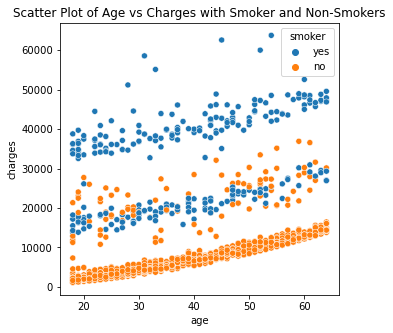

In [17]:
ui = behaviors()

In [18]:
st.header('Data Set')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [19]:
st.dataframe(data)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [20]:
train_R =load_model.score(x_train,y_train)

In [21]:
test_R = load_model.score(x_test,y_test)

In [107]:
st.header('Model Score')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [106]:
st.metric('Coefficient of Determination of Training Data',value=train_R)

'DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)'

In [32]:
def bmi(height,weight):
    h=height/100
    b = weight/(h**2)
    return b

In [33]:
bmi(193,96)

25.77250395983785

In [91]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [101]:
st.header('User Dashboard')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [197]:
def user_inputs():
    age = st.slider('Your Age',1,100,30)
    sex = st.selectbox('Select Your Gendre',['male','female'])
    height = st.slider('Your Height in (cm)',50,250,150)
    weight = st.slider('Your Weight in (Kg)',10,150,50)
    children = st.selectbox('Number of Children in Your Family',[0,1,2,3,4,5])
    smoker = st.radio('Smoker', ['yes','no'])
    region = st.radio('Select Your Region',['northeast','northwest','southeast','southwest'])
    
    bmi1 = bmi(height, weight)
    input_data={
        'age':age,
        'sex':sex,
        'bmi':bmi1,
        'children':children,
        'smoker':smoker,
        'region':region
    }
    
    copy_data = data.copy()
    copy_data.drop('charges', axis=1, inplace=True)
    test_data = pd.DataFrame(input_data, index=[0])
    temp_frame = pd.concat([copy_data,test_data],ignore_index=True, axis=0)
    temp_dum_data = pd.get_dummies(temp_frame, columns=['sex','children','smoker','region'], drop_first=True)
    variable = temp_dum_data.iloc[-1,:]
    c = pd.DataFrame([variable.array], columns=temp_dum_data.columns)
    return c
    
    

user_results = user_inputs()
    
    

In [98]:
st.header('User Inputs')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [201]:
st.write(user_results)

In [196]:
st.header('Predictions')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [199]:
y_prediction = load_model.predict(user_results)

In [202]:
st.subheader(f'Total Charge Will be {y_prediction}')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)